# Analizing data
### In this notebook we will retrive scraped info and analyze it

In [295]:
import pandas as pd
import math
import psycopg2 as ps
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt 

In [441]:
cars_data = pd.read_csv('tosqldb.csv')

In [442]:
cars_data.shape

(38648, 14)

In [434]:
cars_data.columns

Index(['id', 'brand', 'model', 'colour', 'fuel', 'doors', 'engine', 'location',
       'price', 'year', 'transmision', 'km', 'type', 'url'],
      dtype='object')

In [435]:
cars_data.describe()

,id,doors,price,year,km
count,38648.000000,38648.000000,3.864800e+04,38648.000000,38648.000000
mean,20288.629476,987.579538,2.818534e+06,2995.122542,95356.086214
std,32696.305713,31341.400854,2.932399e+06,31278.420231,81296.180558
min,0.000000,-5.000000,1.000000e+03,1928.000000,1.000000
25%,9670.750000,4.000000,1.300000e+06,2012.000000,45000.000000
50%,19342.500000,5.000000,2.400000e+06,2016.000000,82000.000000
75%,29013.250000,5.000000,3.889525e+06,2018.000000,127973.750000
max,1000000.000000,1000000.000000,1.300000e+08,1000000.000000,1000000.000000


We see an annomally in data, since max values go to very big numbers, we remove those values
Also prices are mixed in ARS and USD, so we unify all to ARS
Apart from that we will take out luxury cars from this dataset

In [410]:
cars_data[cars_data["id"]>40000]

,id,brand,model,colour,fuel,doors,engine,location,price,year,transmision,km,type,url
160,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000
1653,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000
3297,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000
3298,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000
3299,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000
3300,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000
3301,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000
4789,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000
8127,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000
9995,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000


In [411]:
cars_data = cars_data.drop(cars_data[cars_data["id"]>40000].index)

In [412]:
cars_data = cars_data.drop(cars_data[cars_data["km"]>700000].index)

In [413]:
#cars_data = cars_data.drop(cars_data[(cars_data["price"]>150000) & (cars_data["price"]<400000) & (cars_data["year"]>2010)].index)

In [436]:
cars_data['currency'] = 'ARS'
cars_data['currency'][(cars_data["price"] < 200000)] = 'USD' 
cars_data = cars_data[cars_data['year']>2000] #this is explained at the GRAPH section

<ipython-input-436-50d9f9d70911>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_data['currency'][(cars_data["price"] < 200000)] = 'USD'


In [437]:

# f1 = (cars_data["price"]<400000) & (cars_data["year"]>2010)
# f2 = (cars_data["price"]<10000)
# cars_data['price'] = cars_data['price'].apply(lambda x: x*200 if x in cars_data[f1]['price'].values else x)
# cars_data['price'] = cars_data['price'].apply(lambda x: x*200 if x in cars_data[f2]['price'].values else x)

In [438]:
cars_data[cars_data['currency']=='USD'].sort_values('price', ascending=False)[:20]

,id,brand,model,colour,fuel,doors,engine,location,price,year,transmision,km,type,url,currency
9910,9910,Land Rover,Evoque,Negro,Nafta,5,NaN,Centro - Santiago del Estero - Santiago del Es...,195000,2020,Automatica,15000,NaN,https://auto.mercadolibre.com.ar/MLA-113603094...,USD
29234,29234,Land Rover,Evoque,Negro,Nafta,5,NaN,Centro - Santiago del Estero - Santiago del Es...,195000,2020,Automatica,15000,NaN,https://auto.mercadolibre.com.ar/MLA-113603094...,USD
29291,29291,Land Rover,Evoque,NaN,Nafta,5,2.0,San Fernando del Valle de Catamarca - Catamarca,190000,2021,Manual,11000,Hatchback,https://auto.mercadolibre.com.ar/MLA-113733452...,USD
9967,9967,Land Rover,Evoque,NaN,Nafta,5,2.0,San Fernando del Valle de Catamarca - Catamarca,190000,2021,Manual,11000,Hatchback,https://auto.mercadolibre.com.ar/MLA-113733452...,USD
14414,14414,Porsche,Cayenne,Blanco,Nafta,5,3.0 Turbo 340cv,Capital Federal - Capital Federal,190000,2019,Automatica,19500,SUV,https://auto.mercadolibre.com.ar/MLA-113364257...,USD
33738,33738,Porsche,Cayenne,Blanco,Nafta,5,3.0 Turbo 340cv,Capital Federal - Capital Federal,190000,2019,Automatica,19500,SUV,https://auto.mercadolibre.com.ar/MLA-113364257...,USD
30588,30588,Mercedes-Benz,Clase GLE,NaN,Nafta,5,NaN,Rio Cuarto - Cordoba,187000,2018,NaN,12000,NaN,https://auto.mercadolibre.com.ar/MLA-113133455...,USD
11264,11264,Mercedes-Benz,Clase GLE,NaN,Nafta,5,NaN,Rio Cuarto - Cordoba,187000,2018,NaN,12000,NaN,https://auto.mercadolibre.com.ar/MLA-113133455...,USD
29560,29560,Mercedes-Benz,Clase E,Plateado,Nafta,4,5.5,Pilar - Bs.As. G.B.A. Norte,184000,2020,Automatica,11000,Sedan,https://auto.mercadolibre.com.ar/MLA-113029784...,USD
10236,10236,Mercedes-Benz,Clase E,Plateado,Nafta,4,5.5,Pilar - Bs.As. G.B.A. Norte,184000,2020,Automatica,11000,Sedan,https://auto.mercadolibre.com.ar/MLA-113029784...,USD


In [417]:
cars_data['price_ars'] = cars_data['price'].apply(lambda x: x*200 if x <= 150000 else x) #Convert to ARS
cars_data = cars_data.drop(cars_data[cars_data["price_ars"]>15000000].index)

##### We also remove the brands that show less than 10  times, we dont lose much data and it brings noise to the charts

In [439]:
cars_data['brand'].value_counts() #We see many brand of "1" car, this translate in bad user input. We can drop them or try to match with the real brand
cars_data['brand'].value_counts()<5
cars_data.groupby('brand').filter(lambda x : len(x)>10)['brand'].value_counts()
cars_data = cars_data.groupby('brand').filter(lambda x : len(x)>10)

In [419]:
cars_data.describe()#this looks better

,id,doors,price,year,km,price_ars
count,36024.000000,36024.000000,3.602400e+04,36024.000000,36024.000000,3.602400e+04
mean,19315.457084,4.396180,2.915782e+06,2015.087664,89237.778648,3.840463e+06
std,11197.161476,0.825329,2.270312e+06,4.202218,63805.394304,2.475057e+06
min,1.000000,-5.000000,1.000000e+03,2001.000000,1.000000,1.550000e+05
25%,9605.750000,4.000000,1.500000e+06,2012.000000,45000.000000,2.150000e+06
50%,19324.000000,5.000000,2.500000e+06,2016.000000,80000.000000,3.120000e+06
75%,28929.250000,5.000000,3.990000e+06,2018.000000,122000.000000,4.700000e+06
max,38647.000000,8.000000,1.500000e+07,2023.000000,700000.000000,1.500000e+07


In [420]:
cars_data

,id,brand,model,colour,fuel,doors,engine,location,price,year,transmision,km,type,url,currency,price_ars
1,1,Audi,A5 Sportback,Gris,Nafta,5,3.2,Villa Martelli - Vicente Lopez - Bs.As. G.B.A....,23500,2011,Automatica,110000,Hatchback,https://auto.mercadolibre.com.ar/MLA-113760527...,USD,4700000
2,2,Audi,A6,Gris,Nafta,4,2.8,Tigre - Bs.As. G.B.A. Norte,27000,2013,Automatica,210000,Sedan,https://auto.mercadolibre.com.ar/MLA-113750858...,USD,5400000
3,3,Audi,A4,NaN,Diesel,4,2.0,Tapalque - Buenos Aires Interior,1700000,2007,Manual,203000,Sedan,https://auto.mercadolibre.com.ar/MLA-113044459...,ARS,1700000
4,4,Audi,A4,Blanco,Nafta,4,1.8,Lomas de Zamora - Lomas de Zamora - Bs.As. G.B...,16000,2012,Manual,110000,Sedan,https://auto.mercadolibre.com.ar/MLA-113745157...,USD,3200000
5,5,Audi,A4,NaN,Nafta,4,2.0,Capital Federal - Capital Federal,57000,2017,Automatica,15000,Sedan,https://auto.mercadolibre.com.ar/MLA-113489010...,USD,11400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38640,38640,Volvo,S60,NaN,Nafta,4,2.0,Rio Chico - Santa Cruz,2655000,2011,Automatica,126000,Sedan,https://auto.mercadolibre.com.ar/MLA-113246668...,ARS,2655000
38641,38641,Volvo,S40,Azul,Nafta,5,NaN,Magdalena - Magdalena - Buenos Aires Interior,800000,2005,Automatica,135000,NaN,https://auto.mercadolibre.com.ar/MLA-113526819...,ARS,800000
38645,38645,Volvo,XC60,Azul,Nafta,5,2.0,Centro - Rosario - Santa Fe,14000,2011,Automatica,135000,SUV,https://auto.mercadolibre.com.ar/MLA-110875003...,USD,2800000
38646,38646,Volvo,S40,Blanco,Nafta,4,NaN,Caballito - Capital Federal - Capital Federal,2400000,2011,Automatica,68000,Sedan,https://auto.mercadolibre.com.ar/MLA-112101811...,ARS,2400000


In [421]:
 cars_data["location"].str.split("-", expand=True)[[0,1,2]]

,0,1,2
1,Villa Martelli,Vicente Lopez,Bs.As. G.B.A. Norte
2,Tigre,Bs.As. G.B.A. Norte,None
3,Tapalque,Buenos Aires Interior,None
4,Lomas de Zamora,Lomas de Zamora,Bs.As. G.B.A. Sur
5,Capital Federal,Capital Federal,None
...,...,...,...
38640,Rio Chico,Santa Cruz,None
38641,Magdalena,Magdalena,Buenos Aires Interior
38645,Centro,Rosario,Santa Fe
38646,Caballito,Capital Federal,Capital Federal


###### we can also split the location data

In [422]:
cars_data[["neighborhood","city", "province"]] =  cars_data["location"].str.split("-", expand=True)[[0,1,2]]
cars_data[['city','province']] = cars_data[['city','province']].fillna(method='ffill',axis=1)#This is bc some locations had 2 values only
cars_data

,id,brand,model,colour,fuel,doors,engine,location,price,year,transmision,km,type,url,currency,price_ars,neighborhood,city,province
1,1,Audi,A5 Sportback,Gris,Nafta,5,3.2,Villa Martelli - Vicente Lopez - Bs.As. G.B.A....,23500,2011,Automatica,110000,Hatchback,https://auto.mercadolibre.com.ar/MLA-113760527...,USD,4700000,Villa Martelli,Vicente Lopez,Bs.As. G.B.A. Norte
2,2,Audi,A6,Gris,Nafta,4,2.8,Tigre - Bs.As. G.B.A. Norte,27000,2013,Automatica,210000,Sedan,https://auto.mercadolibre.com.ar/MLA-113750858...,USD,5400000,Tigre,Bs.As. G.B.A. Norte,Bs.As. G.B.A. Norte
3,3,Audi,A4,NaN,Diesel,4,2.0,Tapalque - Buenos Aires Interior,1700000,2007,Manual,203000,Sedan,https://auto.mercadolibre.com.ar/MLA-113044459...,ARS,1700000,Tapalque,Buenos Aires Interior,Buenos Aires Interior
4,4,Audi,A4,Blanco,Nafta,4,1.8,Lomas de Zamora - Lomas de Zamora - Bs.As. G.B...,16000,2012,Manual,110000,Sedan,https://auto.mercadolibre.com.ar/MLA-113745157...,USD,3200000,Lomas de Zamora,Lomas de Zamora,Bs.As. G.B.A. Sur
5,5,Audi,A4,NaN,Nafta,4,2.0,Capital Federal - Capital Federal,57000,2017,Automatica,15000,Sedan,https://auto.mercadolibre.com.ar/MLA-113489010...,USD,11400000,Capital Federal,Capital Federal,Capital Federal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38640,38640,Volvo,S60,NaN,Nafta,4,2.0,Rio Chico - Santa Cruz,2655000,2011,Automatica,126000,Sedan,https://auto.mercadolibre.com.ar/MLA-113246668...,ARS,2655000,Rio Chico,Santa Cruz,Santa Cruz
38641,38641,Volvo,S40,Azul,Nafta,5,NaN,Magdalena - Magdalena - Buenos Aires Interior,800000,2005,Automatica,135000,NaN,https://auto.mercadolibre.com.ar/MLA-113526819...,ARS,800000,Magdalena,Magdalena,Buenos Aires Interior
38645,38645,Volvo,XC60,Azul,Nafta,5,2.0,Centro - Rosario - Santa Fe,14000,2011,Automatica,135000,SUV,https://auto.mercadolibre.com.ar/MLA-110875003...,USD,2800000,Centro,Rosario,Santa Fe
38646,38646,Volvo,S40,Blanco,Nafta,4,NaN,Caballito - Capital Federal - Capital Federal,2400000,2011,Automatica,68000,Sedan,https://auto.mercadolibre.com.ar/MLA-112101811...,ARS,2400000,Caballito,Capital Federal,Capital Federal


In [423]:
cars_data['colour'].value_counts()[:10] #We get the 10 most common colours
common_colours = cars_data['colour'].value_counts()[:10].index.values
common_colours = cars_data[cars_data['colour'].isin(common_colours)]

In [424]:
common_colours

,id,brand,model,colour,fuel,doors,engine,location,price,year,transmision,km,type,url,currency,price_ars,neighborhood,city,province
1,1,Audi,A5 Sportback,Gris,Nafta,5,3.2,Villa Martelli - Vicente Lopez - Bs.As. G.B.A....,23500,2011,Automatica,110000,Hatchback,https://auto.mercadolibre.com.ar/MLA-113760527...,USD,4700000,Villa Martelli,Vicente Lopez,Bs.As. G.B.A. Norte
2,2,Audi,A6,Gris,Nafta,4,2.8,Tigre - Bs.As. G.B.A. Norte,27000,2013,Automatica,210000,Sedan,https://auto.mercadolibre.com.ar/MLA-113750858...,USD,5400000,Tigre,Bs.As. G.B.A. Norte,Bs.As. G.B.A. Norte
4,4,Audi,A4,Blanco,Nafta,4,1.8,Lomas de Zamora - Lomas de Zamora - Bs.As. G.B...,16000,2012,Manual,110000,Sedan,https://auto.mercadolibre.com.ar/MLA-113745157...,USD,3200000,Lomas de Zamora,Lomas de Zamora,Bs.As. G.B.A. Sur
6,6,Audi,A1,Gris,Nafta,3,1.4,Capital Federal - Capital Federal,18000,2014,Manual,35000,Hatchback,https://auto.mercadolibre.com.ar/MLA-113381028...,USD,3600000,Capital Federal,Capital Federal,Capital Federal
9,9,BMW,X5,Blanco,Nafta,5,3.0,Belgrano - Capital Federal - Capital Federal,59900,2015,Automatica,62000,SUV,https://auto.mercadolibre.com.ar/MLA-113489486...,USD,11980000,Belgrano,Capital Federal,Capital Federal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38630,38630,Volvo,C30,Gris,Nafta,5,2.5,Recoleta - Capital Federal - Capital Federal,12900,2011,Automatica,107000,Hatchback,https://auto.mercadolibre.com.ar/MLA-113672474...,USD,2580000,Recoleta,Capital Federal,Capital Federal
38632,38632,Volvo,XC70,Gris,Nafta,5,2.5,Aranzazu - Escobar - Bs.As. G.B.A. Norte,9000,2007,Automatica,250000,Furgon,https://auto.mercadolibre.com.ar/MLA-113537102...,USD,1800000,Aranzazu,Escobar,Bs.As. G.B.A. Norte
38641,38641,Volvo,S40,Azul,Nafta,5,NaN,Magdalena - Magdalena - Buenos Aires Interior,800000,2005,Automatica,135000,NaN,https://auto.mercadolibre.com.ar/MLA-113526819...,ARS,800000,Magdalena,Magdalena,Buenos Aires Interior
38645,38645,Volvo,XC60,Azul,Nafta,5,2.0,Centro - Rosario - Santa Fe,14000,2011,Automatica,135000,SUV,https://auto.mercadolibre.com.ar/MLA-110875003...,USD,2800000,Centro,Rosario,Santa Fe


Text(0.5, 1.0, 'Cars after 2015 with price less than 15M $')

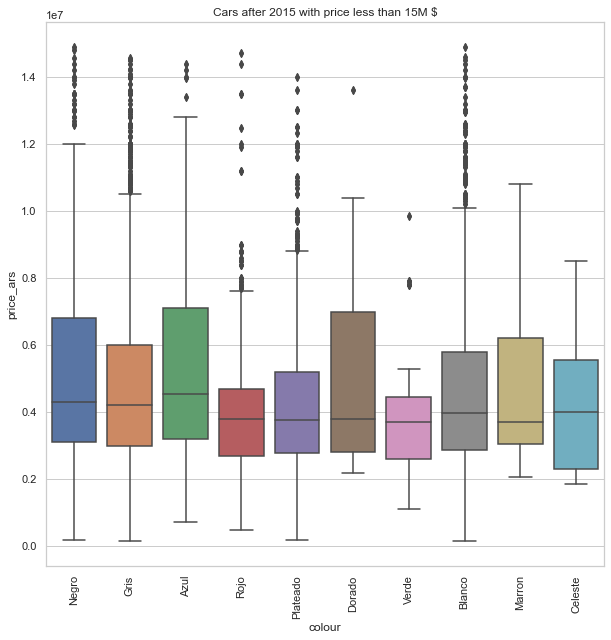

In [425]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.boxplot(x="colour", y="price_ars",  data=common_colours[(common_colours['price_ars']<15000000)  & (common_colours['year']>2015)])
sns.set(style="whitegrid")
plt.xticks(rotation=90)
plt.title("Cars after 2015 with price less than 15M $")

Text(0.5, 1.0, 'Cars before 2015 with price less than 10M $')

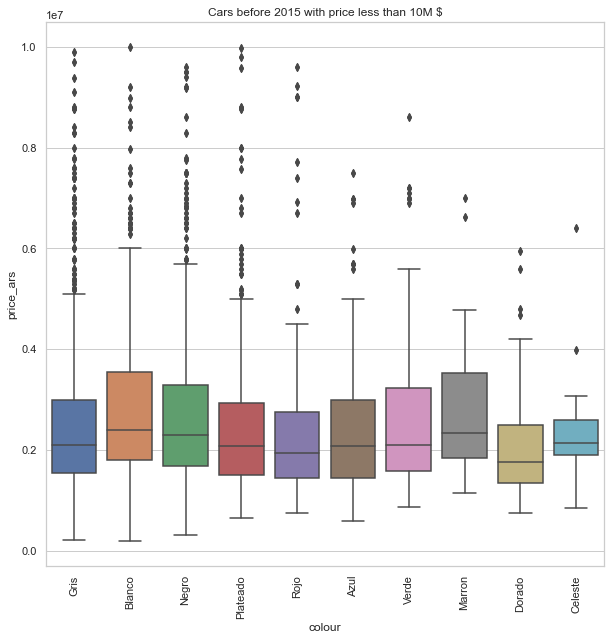

In [426]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.boxplot(x="colour", y="price_ars",  data=common_colours[(common_colours['price_ars']<10000000) & (common_colours['year']<2015)])
sns.set(style="whitegrid")
plt.xticks(rotation=90)
plt.title("Cars before 2015 with price less than 10M $")

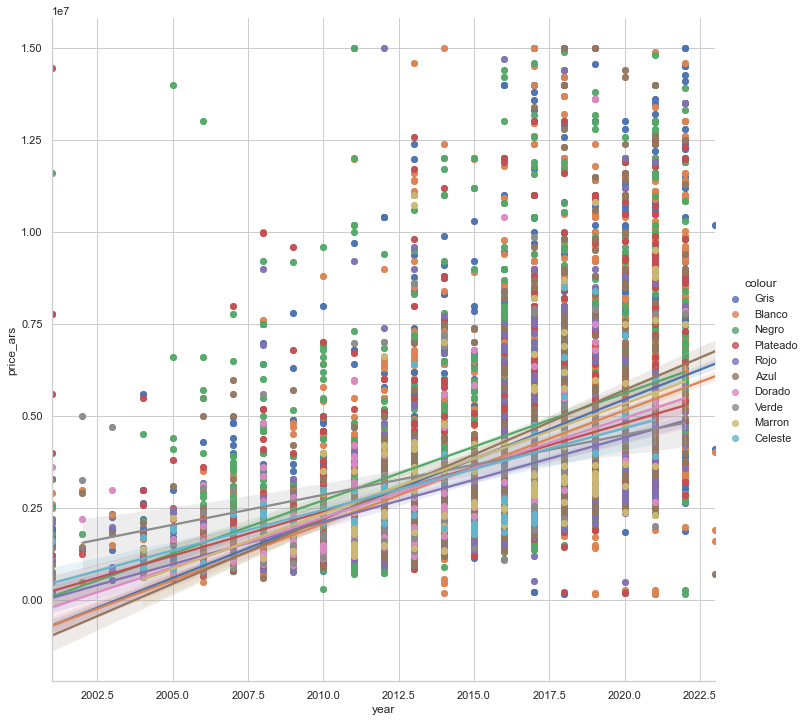

In [427]:
sns.lmplot(data=common_colours, x='year', y='price_ars', hue='colour', height=10)

#### We can see that in average, Black and white used cars retain more value. Green cars are cheapest

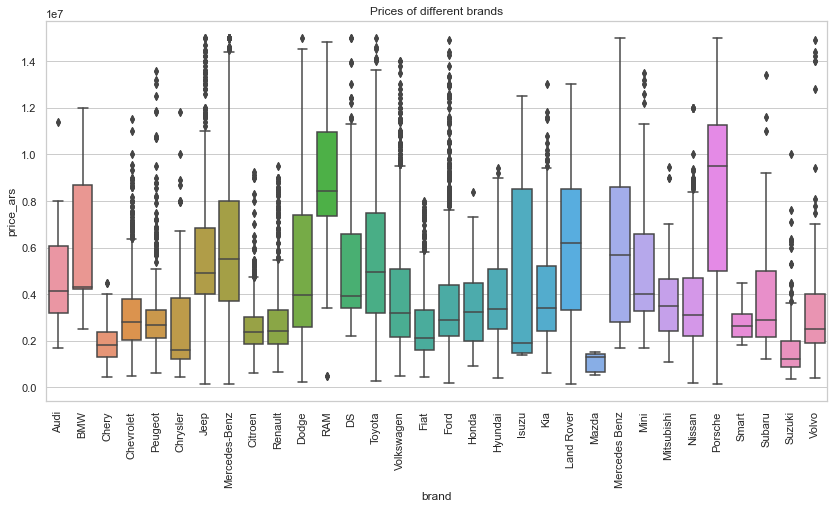

In [428]:

plt.figure(figsize=(14,7))


plt.title("Prices of different brands")
numeric_cols = ['brand', 'price_ars']
sns.boxplot(data=cars_data[numeric_cols], x='brand', y='price_ars')
plt.xticks(rotation=90)
plt.show()

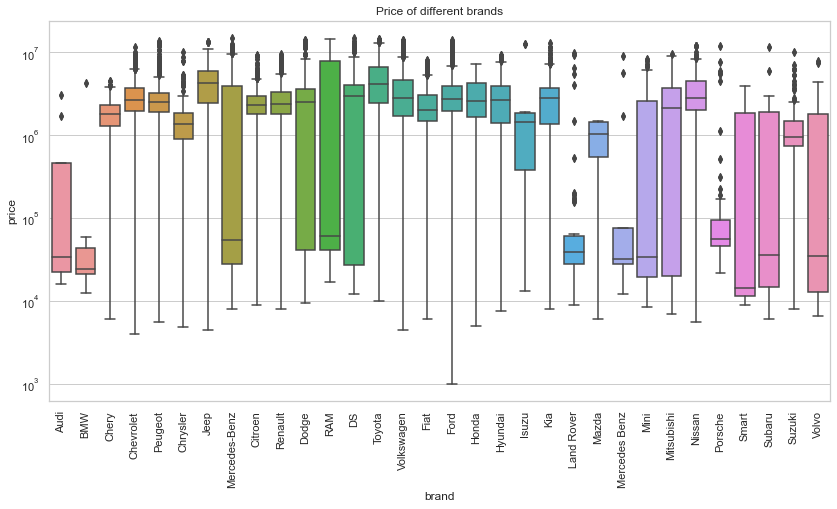

In [429]:

plt.figure(figsize=(14,7))


plt.title("Price of different brands")
numeric_cols = ['brand', 'price']

sns.boxplot(data=cars_data[numeric_cols], x='brand', y='price')
plt.xticks(rotation=90)
plt.yscale('log')

plt.show()

What are the most common brands?

Text(0, 0.5, 'Count')

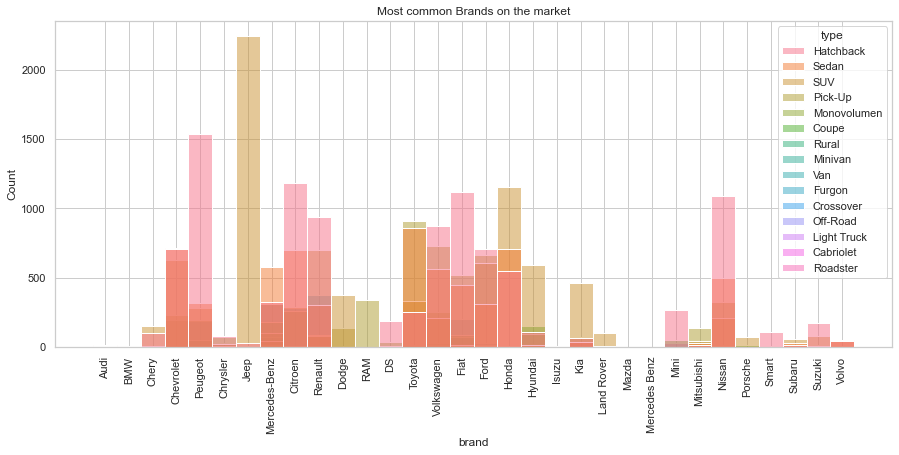

In [430]:

plt.figure(figsize=(15,6))
plt.title("Most common Brands on the market")
sns.histplot(data=cars_data, x='brand', hue='type')
plt.xticks(rotation=90)
plt.ylabel("Count")

Text(0, 0.5, 'Count')

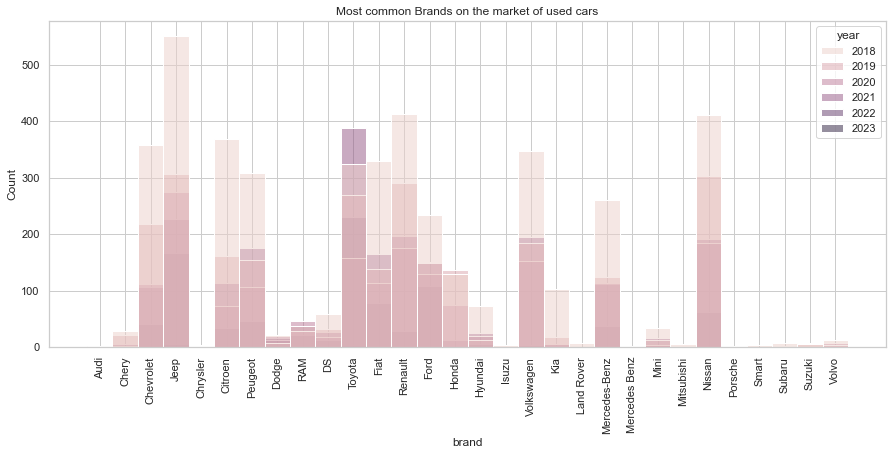

In [353]:

plt.figure(figsize=(15,6))
plt.title("Most common Brands on the market of used cars")
sns.histplot(data=cars_data[cars_data['year']>2017], x='brand', hue='year')
plt.xticks(rotation=90)
plt.ylabel("Count")

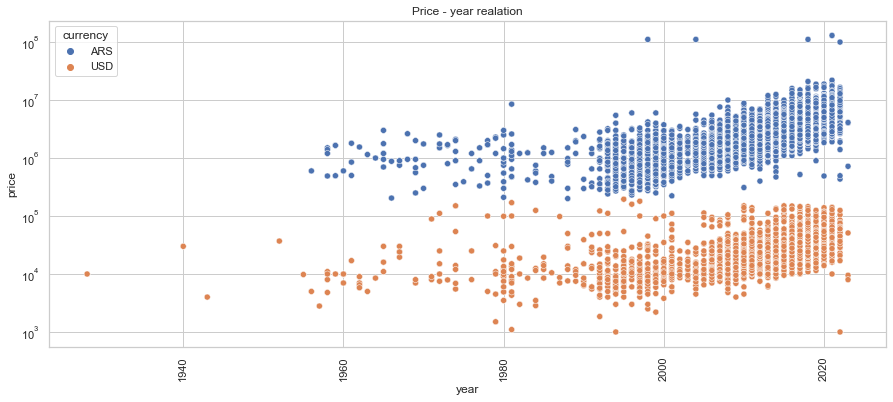

In [378]:

plt.figure(figsize=(15,6))
plt.title("Price - year realation")
sns.scatterplot(data=cars_data_all, x='year', y='price', hue='currency')
plt.xticks(rotation=90)
plt.ylabel("price")
plt.yscale('log')

###### From this scatterplot we can see that old cars (<1990) dont follow a pattern, they may be collectibles or have a different market. Thats why we choose to cut to cars with year >2000

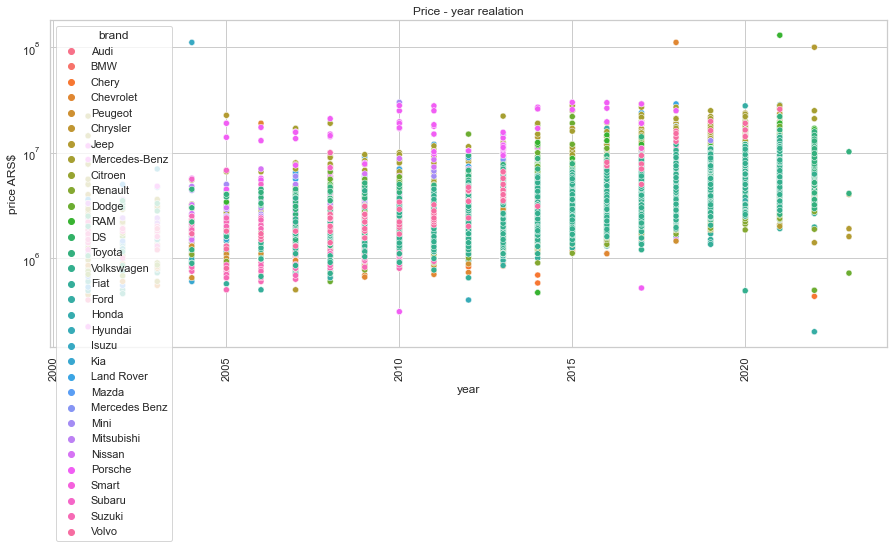

In [355]:

plt.figure(figsize=(15,6))
plt.title("Price - year realation")
sns.scatterplot(data=cars_data, x='year', y='price', hue='brand')
plt.xticks(rotation=90)
plt.ylabel("price ARS$")
plt.yscale('log')

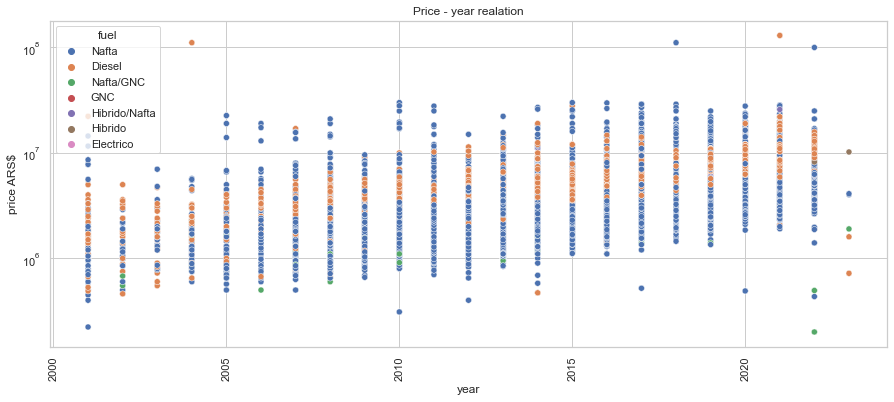

In [356]:

plt.figure(figsize=(15,6))
plt.title("Price - year realation")
sns.scatterplot(data=cars_data, x='year', y='price', hue='fuel')
plt.xticks(rotation=90)
plt.ylabel("price ARS$")
plt.yscale('log')

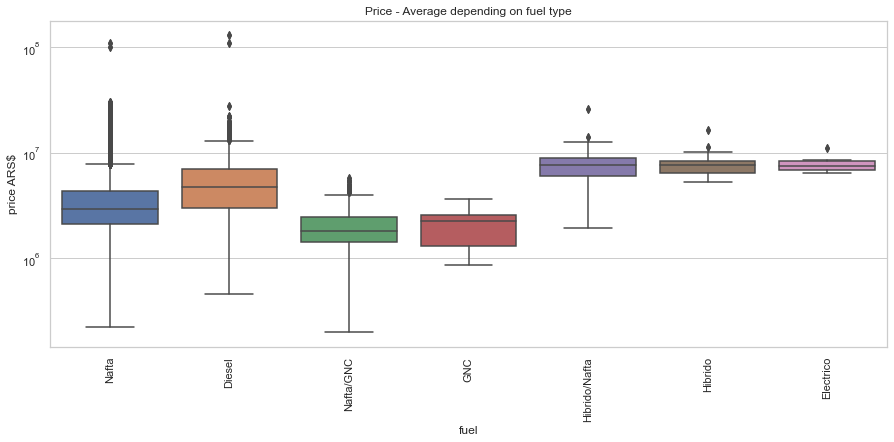

In [357]:
plt.figure(figsize=(15,6))
plt.title("Price - Average depending on fuel type")
sns.boxplot(data=cars_data, x='fuel', y='price')
plt.xticks(rotation=90)
plt.ylabel("price ARS$")
plt.yscale('log')

###### Diesel cars seems to maintain the price between 2007 and 2015

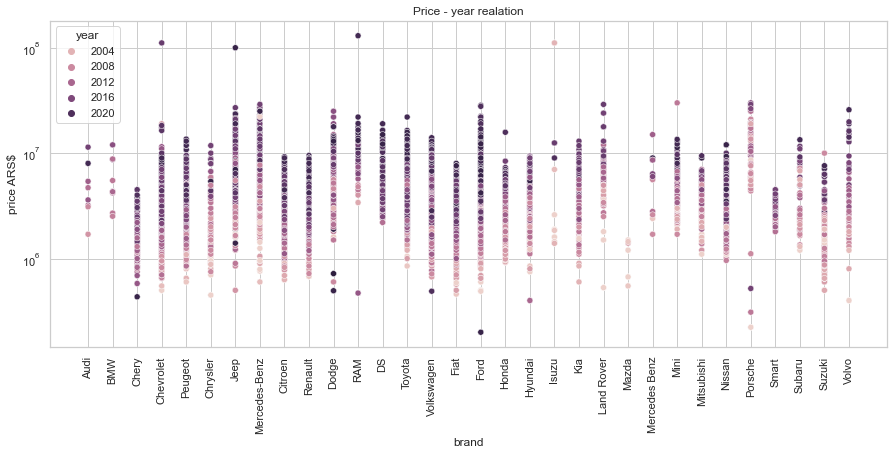

In [358]:

plt.figure(figsize=(15,6))
plt.title("Price - year realation")
sns.scatterplot(data=cars_data, x='brand', y='price',hue='year')
plt.xticks(rotation=90)
plt.ylabel("price ARS$")
plt.yscale('log')

<AxesSubplot:>

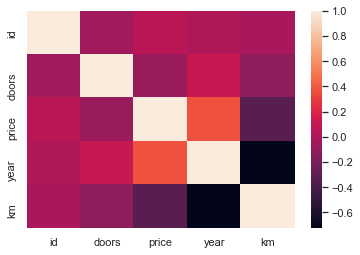

In [359]:
sns.heatmap(cars_data.corr())

###### we can see an obvious negative correlation between price and km and a positive corr between price and year 

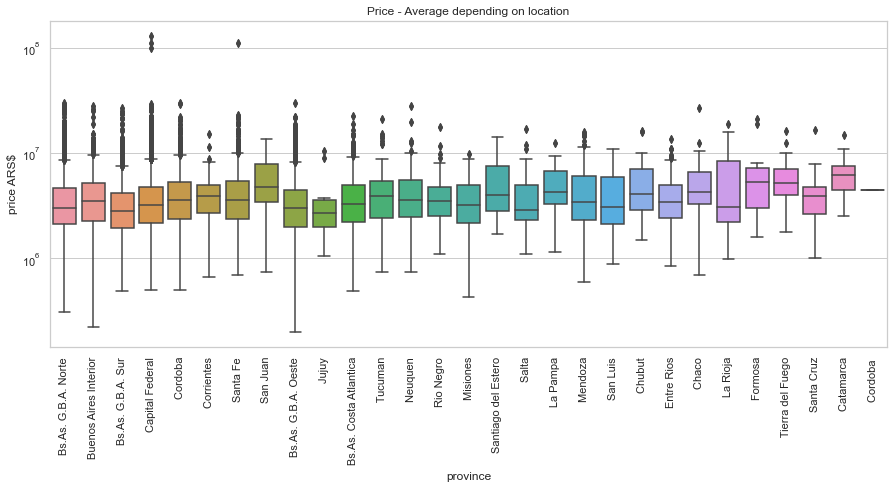

In [360]:
plt.figure(figsize=(15,6))
plt.title("Price - Average depending on location")
sns.boxplot(data=cars_data, x='province', y='price')
plt.xticks(rotation=90)
plt.ylabel("price ARS$")
plt.yscale('log')

In [199]:
import geopandas as gpd
map_gdf = gdp.read_file("linea_de_limite.json")
map_gdf.head()

ModuleNotFoundError: No module named 'geopandas'

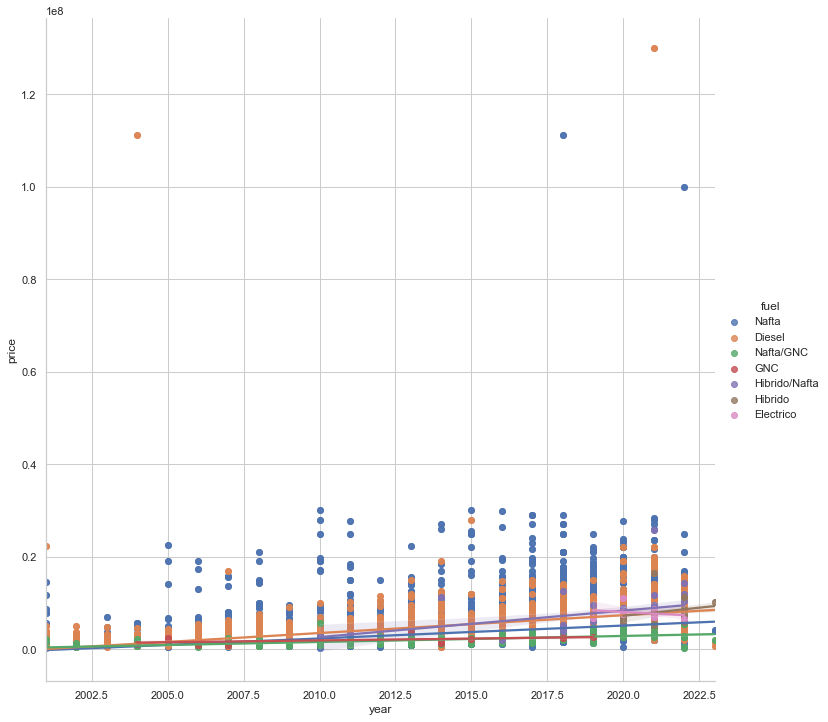

In [361]:
sns.lmplot(data=cars_data, x='year', y='price', hue='fuel', height=10)

In [278]:
cars_data[cars_data["province"].isnull()]['province']=cars_data[cars_data["province"].isnull()]['city']
cars_data[cars_data["province"].isnull()]['city']

<ipython-input-278-1a9f59045f8b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_data[cars_data["province"].isnull()]['province']=cars_data[cars_data["province"].isnull()]['city']


3         Buenos Aires Interior
7               Capital Federal
8           Bs.As. G.B.A. Norte
9             Bs.As. G.B.A. Sur
12             Tierra del Fuego
                  ...          
15732       Bs.As. G.B.A. Oeste
15733                  Santa Fe
15734       Bs.As. G.B.A. Norte
15736           Capital Federal
15739         Bs.As. G.B.A. Sur
Name: city, Length: 7786, dtype: object

In [450]:
cars_data[cars_data['brand']=='Audi']

,id,brand,model,colour,fuel,doors,engine,location,price,year,transmision,km,type,url
1,1,Audi,A5 Sportback,Gris,Nafta,5,3.2,Villa Martelli - Vicente Lopez - Bs.As. G.B.A....,23500,2011,Automatica,110000,Hatchback,https://auto.mercadolibre.com.ar/MLA-113760527...
2,2,Audi,A6,Gris,Nafta,4,2.8,Tigre - Bs.As. G.B.A. Norte,27000,2013,Automatica,210000,Sedan,https://auto.mercadolibre.com.ar/MLA-113750858...
3,3,Audi,A4,NaN,Diesel,4,2.0,Tapalque - Buenos Aires Interior,1700000,2007,Manual,203000,Sedan,https://auto.mercadolibre.com.ar/MLA-113044459...
4,4,Audi,A4,Blanco,Nafta,4,1.8,Lomas de Zamora - Lomas de Zamora - Bs.As. G.B...,16000,2012,Manual,110000,Sedan,https://auto.mercadolibre.com.ar/MLA-113745157...
5,5,Audi,A4,NaN,Nafta,4,2.0,Capital Federal - Capital Federal,57000,2017,Automatica,15000,Sedan,https://auto.mercadolibre.com.ar/MLA-113489010...
6,6,Audi,A1,Gris,Nafta,3,1.4,Capital Federal - Capital Federal,18000,2014,Manual,35000,Hatchback,https://auto.mercadolibre.com.ar/MLA-113381028...
7,7,Audi,A3,NaN,Nafta,4,1.5,Cordoba - Cordoba,40000,2021,Automatica,26000,Sedan,https://auto.mercadolibre.com.ar/MLA-113517246...
8,8,Audi,A6,NaN,Nafta,4,3.2,Esteban Echeverria - Bs.As. G.B.A. Sur,3100000,2008,Automatica,98000,Sedan,https://auto.mercadolibre.com.ar/MLA-113101914...
19325,19325,Audi,A5 Sportback,Gris,Nafta,5,3.2,Villa Martelli - Vicente Lopez - Bs.As. G.B.A....,23500,2011,Automatica,110000,Hatchback,https://auto.mercadolibre.com.ar/MLA-113760527...
19326,19326,Audi,A6,Gris,Nafta,4,2.8,Tigre - Bs.As. G.B.A. Norte,27000,2013,Automatica,210000,Sedan,https://auto.mercadolibre.com.ar/MLA-113750858...


In [451]:
df = pd.read_csv('autos_mercadolibre.csv')
df2 = pd.read_csv('last_scrap.csv')

In [457]:
df3=pd.concat([df, df2], ignore_index=True, sort=False)

In [460]:
df3[df3['Marca']=='Audi']

,Unnamed: 0,Unnamed: 0.1,Marca,Modelo,AÃ±o,Color,Tipo de combustible,Puertas,TransmisiÃ³n,Motor,Tipo de carrocerÃ­a,KilÃ³metros,Location,Price,Link,Año,Transmisión,Tipo de carrocería,Kilómetros
221,221,221.0,Audi,A3,2018.0,NaN,Nafta,4,AutomÃ¡tica,1.4,SedÃ¡n,29000 km,San Isidro - Bs.As. G.B.A. Norte,34000,https://auto.mercadolibre.com.ar/MLA-113815403...,NaN,NaN,NaN,NaN
222,222,222.0,Audi,A1 Sportback,2020.0,NaN,Nafta,5,AutomÃ¡tica,1.0,Hatchback,1000 km,Acassuso - San Isidro - Bs.As. G.B.A. Norte,37000,https://auto.mercadolibre.com.ar/MLA-113315417...,NaN,NaN,NaN,NaN
223,223,223.0,Audi,TT,NaN,Negro,Nafta,2,NaN,1.8,NaN,NaN,Puerto Madero - Capital Federal - Capital Federal,27900,https://auto.mercadolibre.com.ar/MLA-113806473...,2011.0,Manual,Coupé,125000 km
224,224,224.0,Audi,A1,NaN,Gris,Nafta,3,NaN,1.4,NaN,NaN,Morón - Bs.As. G.B.A. Oeste,3350000,https://auto.mercadolibre.com.ar/MLA-113593913...,2015.0,Manual,Hatchback,117000 km
225,225,225.0,Audi,A5 Sportback,2011.0,Gris,Nafta,3,AutomÃ¡tica,2.0,Hatchback,129000 km,Crucesita - Avellaneda - Bs.As. G.B.A. Sur,3951000,https://auto.mercadolibre.com.ar/MLA-113678661...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15745,4,NaN,Audi,A4,2012.0,Blanco,Nafta,4,Manual,1.8,SedÃ¡n,110000 km,Lomas de Zamora - Lomas de Zamora - Bs.As. G.B...,16000,https://auto.mercadolibre.com.ar/MLA-113745157...,NaN,NaN,NaN,NaN
15746,5,NaN,Audi,A4,2017.0,NaN,Nafta,4,AutomÃ¡tica,2.0,SedÃ¡n,15000 km,Capital Federal - Capital Federal,57000,https://auto.mercadolibre.com.ar/MLA-113489010...,NaN,NaN,NaN,NaN
15747,6,NaN,Audi,A1,2014.0,Gris,Nafta,3,Manual,1.4,Hatchback,35000 km,Capital Federal - Capital Federal,18000,https://auto.mercadolibre.com.ar/MLA-113381028...,NaN,NaN,NaN,NaN
15748,7,NaN,Audi,A3,2021.0,NaN,Nafta,4,AutomÃ¡tica,1.5,SedÃ¡n,26000 km,CÃ³rdoba - CÃ³rdoba,40000,https://auto.mercadolibre.com.ar/MLA-113517246...,NaN,NaN,NaN,NaN
